In [ ]:
!pip install hvac

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.9/144.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyhcl: filename=pyhcl-0.4.4-py3-none-any.whl size=50127 sha256=b60624768dcdd383e0982cb0fe5333a081d609728e971e9a522c9557e481d644
  Stored in directory: /root/.cache/pip/wheels/6c/ad/33/e11e917cf04cb1533cab6e7aaa8cee93c950aa82c32398b83e
Successfully built pyhcl


In [ ]:
import hvac
import sys
import time

import subprocess
import threading

def create_vault_client():
    # Set up the Vault client
    client = hvac.Client(url='http://localhost:8200')

    # Authenticate with the root token provided when starting the Vault server in development mode
    client.token = 'dev-only-token' #THIS IS FOR TESTING ONLY, WE WOULD NEVER STORE HERE

    return client

def run_command():
    command = "vault server -dev -dev-root-token-id=dev-only-token" #TESTING ONLY THIS IS IN DEV MODE
    subprocess.run(command, shell=True)

def get_stored_token(client):
    # Set up the Vault client
    #client = hvac.Client(url='http://localhost:8200')

    # Authenticate with the root token provided when starting the Vault server in development mode
    #client.token = 'dev-only-token'

    # Retrieve the stored token from Vault
    try:
        response = client.secrets.kv.v2.read_secret_version(
            path='secret/data/token',raise_on_deleted_version=True
        )
        stored_token = response['data']['data']['value']
        return stored_token
    except Exception as e:
        print("Error retrieving stored token:", e)
        return None

run_vault = threading.Thread(target=run_command)
run_vault.start()
time.sleep(5)

# Set up the Vault client
client = hvac.Client(url='http://localhost:8200')

# Authenticate with the root token provided when starting the Vault server in development mode
client.token = 'dev-only-token'

# Store the token in the Vault
create_response = client.secrets.kv.v2.create_or_update_secret(
    path='secret/data/token',
    secret=dict(value='!Q#E%T&U8i6y4r2w')
)

# For testing
"""
stored_token = get_stored_token()
if stored_token:
    print("Stored token:", stored_token)
else:
    print("Failed to retrieve stored token")
"""


==> Vault server configuration:

Administrative Namespace: 
             Api Address: http://127.0.0.1:8200
                     Cgo: disabled
         Cluster Address: https://127.0.0.1:8201
   Environment Variables: CLICOLOR, CLICOLOR_FORCE, COLORTERM, DBUS_SESSION_BUS_ADDRESS, DBUS_STARTER_ADDRESS, DBUS_STARTER_BUS_TYPE, DEBUGINFOD_URLS, DESKTOP_SESSION, DISPLAY, FORCE_COLOR, GDMSESSION, GIT_PAGER, GNOME_DESKTOP_SESSION_ID, GNOME_SETUP_DISPLAY, GNOME_SHELL_SESSION_MODE, GNOME_TERMINAL_SCREEN, GNOME_TERMINAL_SERVICE, GODEBUG, GTK_MODULES, HOME, IM_CONFIG_PHASE, JPY_PARENT_PID, JPY_SESSION_NAME, LANG, LOGNAME, MPLBACKEND, PAGER, PATH, PWD, PYDEVD_USE_FRAME_EVAL, QT_ACCESSIBILITY, QT_IM_MODULE, SESSION_MANAGER, SHELL, SSH_AGENT_LAUNCHER, SSH_AUTH_SOCK, SYSTEMD_EXEC_PID, TERM, USER, USERNAME, VTE_VERSION, WAYLAND_DISPLAY, XAUTHORITY, XDG_CONFIG_DIRS, XDG_CURRENT_DESKTOP, XDG_DATA_DIRS, XDG_MENU_PREFIX, XDG_RUNTIME_DIR, XDG_SESSION_CLASS, XDG_SESSION_DESKTOP, XDG_SESSION_TYPE, XMODIFIERS

2023-08-07T19:11:31.405-0400 [INFO]  proxy environment: http_proxy="" https_proxy="" no_proxy=""
2023-08-07T19:11:31.405-0400 [WARN]  no `api_addr` value specified in config or in VAULT_API_ADDR; falling back to detection if possible, but this value should be manually set
2023-08-07T19:11:31.405-0400 [INFO]  core: Initializing version history cache for core
2023-08-07T19:11:31.406-0400 [INFO]  core: security barrier not initialized
2023-08-07T19:11:31.406-0400 [INFO]  core: security barrier initialized: stored=1 shares=1 threshold=1
2023-08-07T19:11:31.406-0400 [INFO]  core: post-unseal setup starting
2023-08-07T19:11:31.422-0400 [INFO]  core: loaded wrapping token key
2023-08-07T19:11:31.422-0400 [INFO]  core: successfully setup plugin catalog: plugin-directory=""
2023-08-07T19:11:31.422-0400 [INFO]  core: no mounts; adding default mount table
2023-08-07T19:11:31.426-0400 [INFO]  core: successfully mounted: type=cubbyhole version="v1.14.1+builtin.vault" path=cubbyhole/ namespace="ID: 

'\nstored_token = get_stored_token()\nif stored_token:\n    print("Stored token:", stored_token)\nelse:\n    print("Failed to retrieve stored token")\n'

### Vault Functions

In [ ]:
import hvac
import sys

import subprocess
import threading

def create_vault_client():
    # Set up the Vault client
    client = hvac.Client(url='http://localhost:8200')

    # Authenticate with the root token provided when starting the Vault server in development mode
    client.token = 'dev-only-token' #THIS IS FOR TESTING ONLY, WE WOULD NEVER STORE HERE

    return client

def run_command():
    command = "vault server -dev -dev-root-token-id=dev-only-token" #TESTING ONLY THIS IS IN DEV MODE
    subprocess.run(command, shell=True)

def get_stored_token(client):
    # Set up the Vault client
    #client = hvac.Client(url='http://localhost:8200')

    # Authenticate with the root token provided when starting the Vault server in development mode
    #client.token = 'dev-only-token'

    # Retrieve the stored token from Vault
    try:
        response = client.secrets.kv.v2.read_secret_version(
            path='secret/data/token',raise_on_deleted_version=True
        )
        stored_token = response['data']['data']['value']
        return stored_token
    except Exception as e:
        print("Error retrieving stored token:", e)
        return None

### SampleNetworkServer.py

<IPython.core.display.Javascript object>


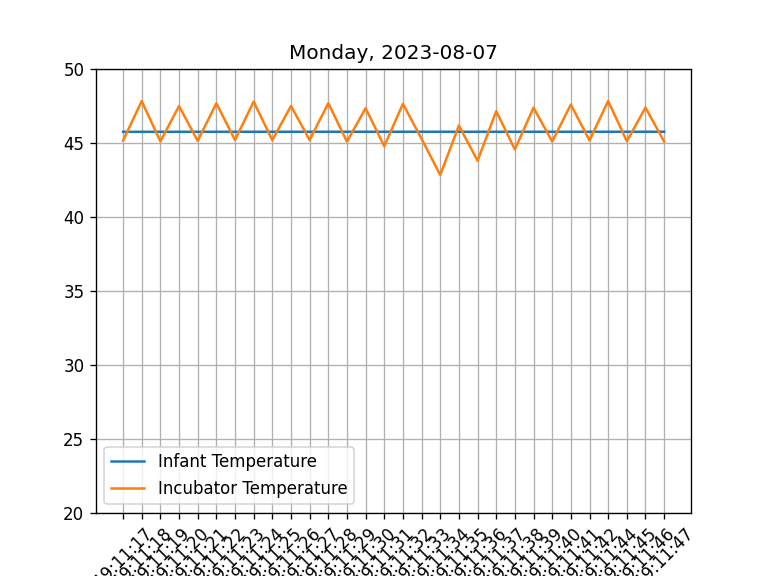

/tmp/ipykernel_3943/2061748475.py:210: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani = animation.FuncAnimation(self.fig, self.updateInfTemp, interval=500)
/tmp/ipykernel_3943/2061748475.py:211: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani2 = animation.FuncAnimation(self.fig, self.updateIncTemp, interval=500)


In [ ]:
%matplotlib notebook
import threading
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import infinc
import time
import math
import socket
import fcntl
import os
import errno

import string

import secrets
from collections import deque
from threading import Lock
import hvac

#from run_vault import create_vault_client
#from run_vault import get_stored_token

# changes:
# switched UDP to TCP
# random fix
# DOS/DOS rate fix
# hashicorp vault for token
# error handling

# Vulnerability 1 global constants
MAX_REQUESTS_PER_SECOND = 100
MAX_IPS = 10

class SmartNetworkThermometer(threading.Thread):
    open_cmds = ["AUTH", "LOGOUT"]
    prot_cmds = ["SET_DEGF", "SET_DEGC", "SET_DEGK", "GET_TEMP", "UPDATE_TEMP"]

    def __init__(self, source, updatePeriod, port):
        threading.Thread.__init__(self, daemon=True)
        #set daemon to be true, so it doesn't block program from exiting
        self.source = source
        self.updatePeriod = updatePeriod
        self.curTemperature = 0
        self.updateTemperature()
        self.tokens = []

        self.serverSocket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)  # switched to TCP in preparation for TLS
        self.serverSocket.bind(("127.0.0.1", port))
        self.serverSocket.listen(5)  # Listen for incoming connections

        self.deg = "K"

        # Vulnerability 1 Rate limiter attributes (for DDOS and DOS attacks)
        self.max_requests_per_second = MAX_REQUESTS_PER_SECOND
        self.max_ips = MAX_IPS
        self.ip_request_times = {}
        self.ip_locks = {}

        # Set up the Vault client
        self.vault_client = create_vault_client()

    # Vulnerability 1 rate limiting function
    def is_rate_limited(self, ip):
        if ip not in self.ip_request_times:
            self.ip_request_times[ip] = deque(maxlen=self.max_requests_per_second)
            self.ip_locks[ip] = Lock()

        with self.ip_locks[ip]:
            request_times = self.ip_request_times[ip]
            current_time = time.time()
            while request_times and current_time - request_times[0] > 1:
                request_times.popleft()

            if len(request_times) >= self.max_requests_per_second:
                return True

            request_times.append(current_time)
            return False

    def setSource(self, source):
        self.source = source

    def setUpdatePeriod(self, updatePeriod):
        self.updatePeriod = updatePeriod

    def setDegreeUnit(self, s):
        self.deg = s
        if self.deg not in ["F", "K", "C"]:
            self.deg = "K"

    def updateTemperature(self):
        self.curTemperature = self.source.getTemperature()

    def getTemperature(self):
        if self.deg == "C":
            return self.curTemperature - 273
        if self.deg == "F":
            return (self.curTemperature - 273) * 9 / 5 + 32

        return self.curTemperature

    def processCommands(self, msg, clientSocket):
        cmds = msg.split(';')
        for c in cmds:
            cs = c.split(' ')
            if len(cs) == 2:  # should be either AUTH or LOGOUT
                if cs[0] == "AUTH":
                    try:  # Vulnerability 3 error handling: Handle errors during AUTH processing
                        if cs[1] == get_stored_token(self.vault_client):
                            self.tokens.append(''.join(secrets.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for _ in range(16)))
                            clientSocket.send(self.tokens[-1].encode("utf-8"))
                        else:
                            clientSocket.send(b"Bad Token\n")
                    except:
                        clientSocket.send(b"Error processing AUTH\n")
                elif cs[0] == "LOGOUT":
                    try:  # Vulnerability 3 error handling: Handle errors during LOGOUT processing
                        if cs[1] in self.tokens:
                            self.tokens.remove(cs[1])
                    except:
                        clientSocket.send(b"Error processing LOGOUT\n")
                else:
                    clientSocket.send(b"Invalid Command\n")
            elif c == "SET_DEGF":
                self.deg = "F"
            elif c == "SET_DEGC":
                self.deg = "C"
            elif c == "SET_DEGK":
                self.deg = "K"
            elif c == "GET_TEMP":
                try:  # Vulnerability 3 error handling: Handle errors during GET_TEMP processing
                    clientSocket.send(b"%f\n" % self.getTemperature())
                except:
                    clientSocket.send(b"Error processing GET_TEMP\n")
            elif c == "UPDATE_TEMP":
                try:  # Vulnerability 3 error handling: Handle errors during UPDATE_TEMP processing
                    self.updateTemperature()
                except:
                    clientSocket.send(b"Error processing UPDATE_TEMP\n")
            elif c:
                clientSocket.send(b"Invalid Command\n")

    def run(self):  # the running function
        while True:
            try:
                clientSocket, addr = self.serverSocket.accept()
                ip, _ = addr

                if len(self.ip_request_times) > self.max_ips:
                    clientSocket.send(b"Too many IPs\n")
                    clientSocket.close()
                    continue
                # Vulnerability 1 check if rate limited
                if self.is_rate_limited(ip):
                    clientSocket.send(b"Rate limited\n")
                    clientSocket.close()
                    continue

                msg = clientSocket.recv(1024).decode("utf-8").strip()
                cmds = msg.split(' ')
                if len(cmds) == 1:  # protected commands case
                    semi = msg.find(';')
                    if semi != -1:  # if we found the semicolon
                        # print (msg)
                        if msg[:semi] in self.tokens:  # if its a valid token
                            self.processCommands(msg[semi + 1:], clientSocket)
                        else:
                            clientSocket.send(b"Bad Token\n")
                    else:
                        clientSocket.send(b"Bad Command\n")
                elif len(cmds) == 2:
                    if cmds[0] in self.open_cmds:  # if its AUTH or LOGOUT
                        self.processCommands(msg, clientSocket)
                    else:
                        clientSocket.send(b"Authenticate First\n")
                else:
                    # otherwise bad command
                    clientSocket.send(b"Bad Command\n")

                clientSocket.close()

            except IOError as e:
                if e.errno == errno.EWOULDBLOCK:
                    pass
                else:
                    clientSocket.send(b"Error\n")

            self.updateTemperature()
            time.sleep(self.updatePeriod)




class SimpleClient:
    def __init__(self, therm1, therm2):
        self.fig, self.ax = plt.subplots()
        now = time.time()
        self.lastTime = now
        self.times = [time.strftime("%H:%M:%S", time.localtime(now - i)) for i in range(30, 0, -1)]
        self.infTemps = [0] * 30
        self.incTemps = [0] * 30
        self.infLn, = plt.plot(range(30), self.infTemps, label="Infant Temperature")
        self.incLn, = plt.plot(range(30), self.incTemps, label="Incubator Temperature")
        plt.xticks(range(30), self.times, rotation=45)
        plt.ylim((20, 50))
        plt.legend(handles=[self.infLn, self.incLn])
        self.infTherm = therm1
        self.incTherm = therm2

        self.ani = animation.FuncAnimation(self.fig, self.updateInfTemp, interval=500)
        self.ani2 = animation.FuncAnimation(self.fig, self.updateIncTemp, interval=500)

    def updateTime(self):
        now = time.time()
        if math.floor(now) > math.floor(self.lastTime):
            t = time.strftime("%H:%M:%S", time.localtime(now))
            self.times.append(t)
            # last 30 seconds of data
            self.times = self.times[-30:]
            self.lastTime = now
            plt.xticks(range(30), self.times, rotation=45)
            plt.title(time.strftime("%A, %Y-%m-%d", time.localtime(now)))

    def updateInfTemp(self, frame):
        self.updateTime()
        inf_temp = self.infTherm.getTemperature() - 273

        try:  # Vulnerability 3 error handling: Handle errors during updating infant temperature
            with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as clientSocket:
                clientSocket.connect(("127.0.0.1", 23456))
                clientSocket.sendall(str(inf_temp).encode("utf-8"))
        except Exception as e:
            print("Error sending infant temperature:", e)

        self.infTemps.append(inf_temp)
        self.infTemps = self.infTemps[-30:]
        self.infLn.set_data(range(30), self.infTemps)
        return self.infLn,

    def updateIncTemp(self, frame):
        self.updateTime()
        inc_temp = self.incTherm.getTemperature() - 273

        try:  # Vulnerability 3 error handling: Handle errors during updating incubator temperature
            with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as clientSocket:
                clientSocket.connect(("127.0.0.1", 23457))
                clientSocket.sendall(str(inc_temp).encode("utf-8"))
        except Exception as e:
            print("Error sending incubator temperature:", e)

        self.incTemps.append(inc_temp)
        self.incTemps = self.incTemps[-30:]
        self.incLn.set_data(range(30), self.incTemps)
        return self.incLn,

UPDATE_PERIOD = .05 #in seconds
SIMULATION_STEP = .1 #in seconds

#create a new instance of IncubatorSimulator
bob = infinc.Human(mass = 8, length = 1.68, temperature = 36 + 273)
#bobThermo = infinc.SmartThermometer(bob, UPDATE_PERIOD)
bobThermo = SmartNetworkThermometer(bob, UPDATE_PERIOD, 23456)
bobThermo.start() #start the thread

inc = infinc.Incubator(width = 1, depth=1, height = 1, temperature = 37 + 273, roomTemperature = 20 + 273)
#incThermo = infinc.SmartNetworkThermometer(inc, UPDATE_PERIOD)
incThermo = SmartNetworkThermometer(inc, UPDATE_PERIOD, 23457)
incThermo.start() #start the thread

incHeater = infinc.SmartHeater(powerOutput = 1500, setTemperature = 45 + 273, thermometer = incThermo, updatePeriod = UPDATE_PERIOD)
inc.setHeater(incHeater)
incHeater.start() #start the thread

sim = infinc.Simulator(infant = bob, incubator = inc, roomTemp = 20 + 273, timeStep = SIMULATION_STEP, sleepTime = SIMULATION_STEP / 10)

sim.start()

sc = SimpleClient(bobThermo, incThermo)

plt.grid()
plt.show()


### SampleNetworkClient.py

<IPython.core.display.Javascript object>


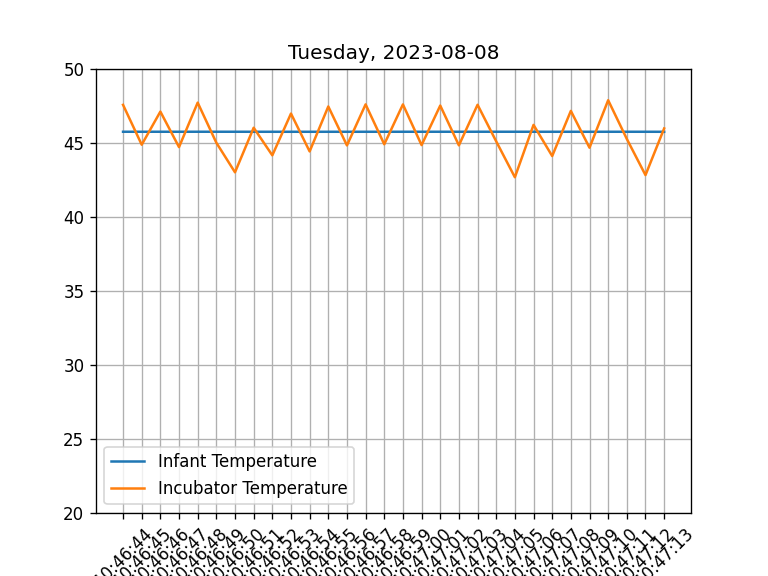

/tmp/ipykernel_3943/137157569.py:66: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani = animation.FuncAnimation(self.fig, self.updateInfTemp, interval=500)
/tmp/ipykernel_3943/137157569.py:67: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani2 = animation.FuncAnimation(self.fig, self.updateIncTemp, interval=500)


In [ ]:
# switched to TCP from UDP in preparation for TLS
# rate limits
# hashicorp vault for token
# error handling for server results and socket

"""
modified the getTemperatureFromPort and authenticate methods to return None on error conditions. This helps in handling errors gracefully and prevents crashes due to unexpected exceptions."""

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import math
import socket

import hvac
import sys
from functools import wraps

#from run_vault import get_stored_token
#from run_vault import create_vault_client

# Vulnerability 1 rate limiting global constant
RATE_LIMIT = 100  # per second

# Vulnerability 1 we provide a wrapper around functions that contact the server to limit them to maximum RATE_MINUTE calls per second
def rate_limited(max_per_second):
    min_interval = 1.0 / float(max_per_second)

    def decorate(func):
        last_time_called = [0.0]

        @wraps(func)
        def rate_limited_function(*args, **kwargs):
            elapsed = time.perf_counter() - last_time_called[0]
            left_to_wait = min_interval - elapsed
            if left_to_wait > 0:
                time.sleep(left_to_wait)
            ret = func(*args, **kwargs)
            last_time_called[0] = time.perf_counter()
            return ret

        return rate_limited_function

    return decorate


class SimpleNetworkClient:
    def __init__(self, port1, port2):
        self.fig, self.ax = plt.subplots()
        now = time.time()
        self.lastTime = now
        self.times = [time.strftime("%H:%M:%S", time.localtime(now - i)) for i in range(30, 0, -1)]
        self.infTemps = [0] * 30
        self.incTemps = [0] * 30
        self.infLn, = plt.plot(range(30), self.infTemps, label="Infant Temperature")
        self.incLn, = plt.plot(range(30), self.incTemps, label="Incubator Temperature")
        plt.xticks(range(30), self.times, rotation=45)
        plt.ylim((20, 50))
        plt.legend(handles=[self.infLn, self.incLn])
        self.infPort = port1
        self.incPort = port2

        self.infToken = None
        self.incToken = None

        self.ani = animation.FuncAnimation(self.fig, self.updateInfTemp, interval=500)
        self.ani2 = animation.FuncAnimation(self.fig, self.updateIncTemp, interval=500)

        # Set up the Vault client
        self.vault_client = create_vault_client()

    def updateTime(self):
        now = time.time()
        if math.floor(now) > math.floor(self.lastTime):
            t = time.strftime("%H:%M:%S", time.localtime(now))
            self.times.append(t)
            # last 30 seconds of data
            self.times = self.times[-30:]
            self.lastTime = now
            plt.xticks(range(30), self.times, rotation=45)
            plt.title(time.strftime("%A, %Y-%m-%d", time.localtime(now)))

    @rate_limited(RATE_LIMIT)
    def getTemperatureFromPort(self, p, tok):
        try:
            with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
                s.connect(("127.0.0.1", p))
                s.sendall(b"%s;GET_TEMP" % tok)
                msg = s.recv(1024)
            m = msg.decode("utf-8")
            try:
                temperature = float(m)
                return temperature
            except ValueError:
                print("Received non-numeric value:", m)
                return None  # Vulnerability 3 error handling: Return None on error
        except socket.error as e:
            print("Socket error:", e)
            return None  # Vulnerability 3 error handling: Return None on error

    @rate_limited(RATE_LIMIT)
    def authenticate(self, p, pw):
        try:
            with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
                s.connect(("127.0.0.1", p))
                s.sendall(b"AUTH %s" % pw)
                msg = s.recv(1024)
            return msg.strip()
        except socket.error as e:
            print("Socket error:", e)
            return None  # Vulnerability 3 error handling: Return None on error

    def updateInfTemp(self, frame):
        self.updateTime()
        if self.infToken is None:  # not yet authenticated
            self.infToken = self.authenticate(self.infPort, get_stored_token(self.vault_client).encode('utf-8'))

        temperature = self.getTemperatureFromPort(self.infPort, self.infToken)

        if temperature is not None and isinstance(temperature, float):
            self.infTemps.append(temperature - 273)
        else:
            print("Discarded non-float temperature:", temperature) # Vulnerability 3 error handling for rate limiting

        self.infTemps = self.infTemps[-30:]
        self.infLn.set_data(range(30), self.infTemps)
        return self.infLn,

    def updateIncTemp(self, frame):
        self.updateTime()
        if self.incToken is None:  # not yet authenticated
            self.incToken = self.authenticate(self.incPort, get_stored_token(self.vault_client).encode('utf-8'))

        temperature = self.getTemperatureFromPort(self.incPort, self.incToken)

        if temperature is not None and isinstance(temperature, float):
            self.incTemps.append(temperature - 273)
        else:
            print("Discarded non-float temperature:", temperature) # Vulnerability 3 error handling for rate limiting

        self.incTemps = self.incTemps[-30:]
        self.incLn.set_data(range(30), self.incTemps)
        return self.incLn,


snc = SimpleNetworkClient(23456, 23457)

plt.grid()
plt.show()


### Vulnerability 1 & 2 - DoS and DDOS in SimpleNetworkClient.py and SimpleNetworkServer.py

#### Patch: Querying System within parameters
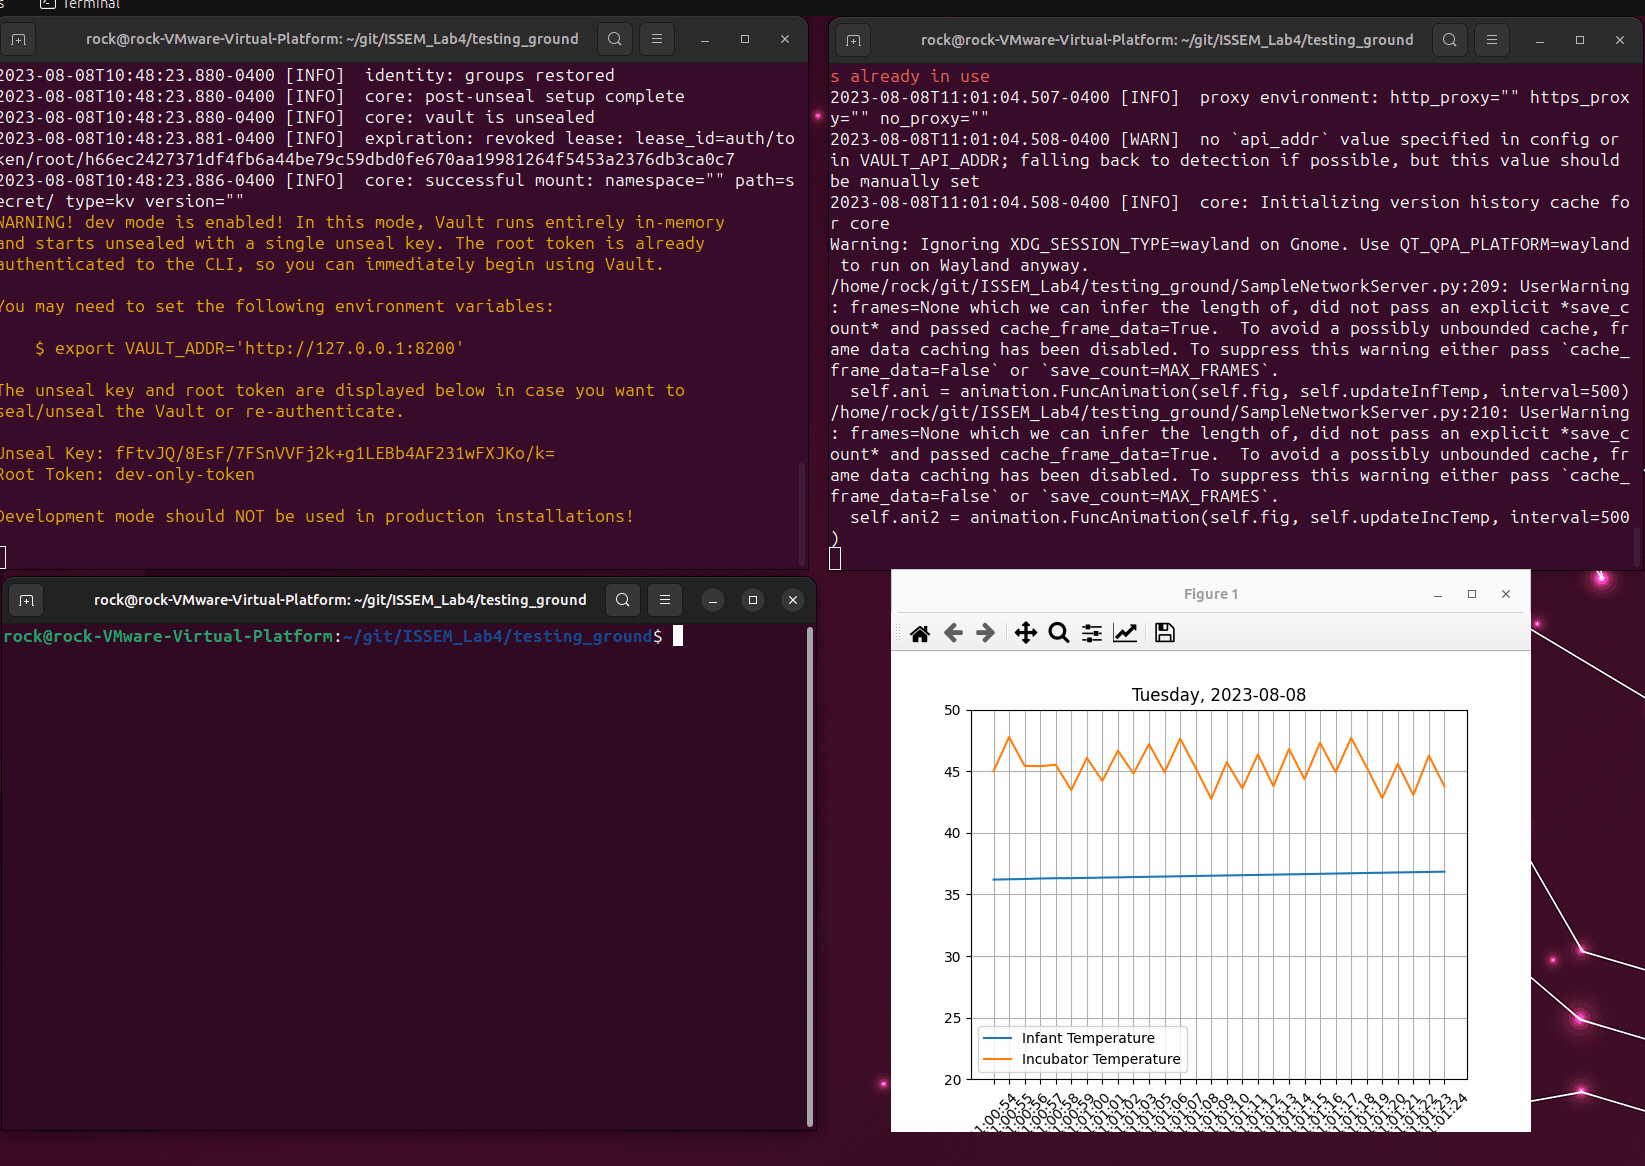

#### Patch: Querying System too frequently
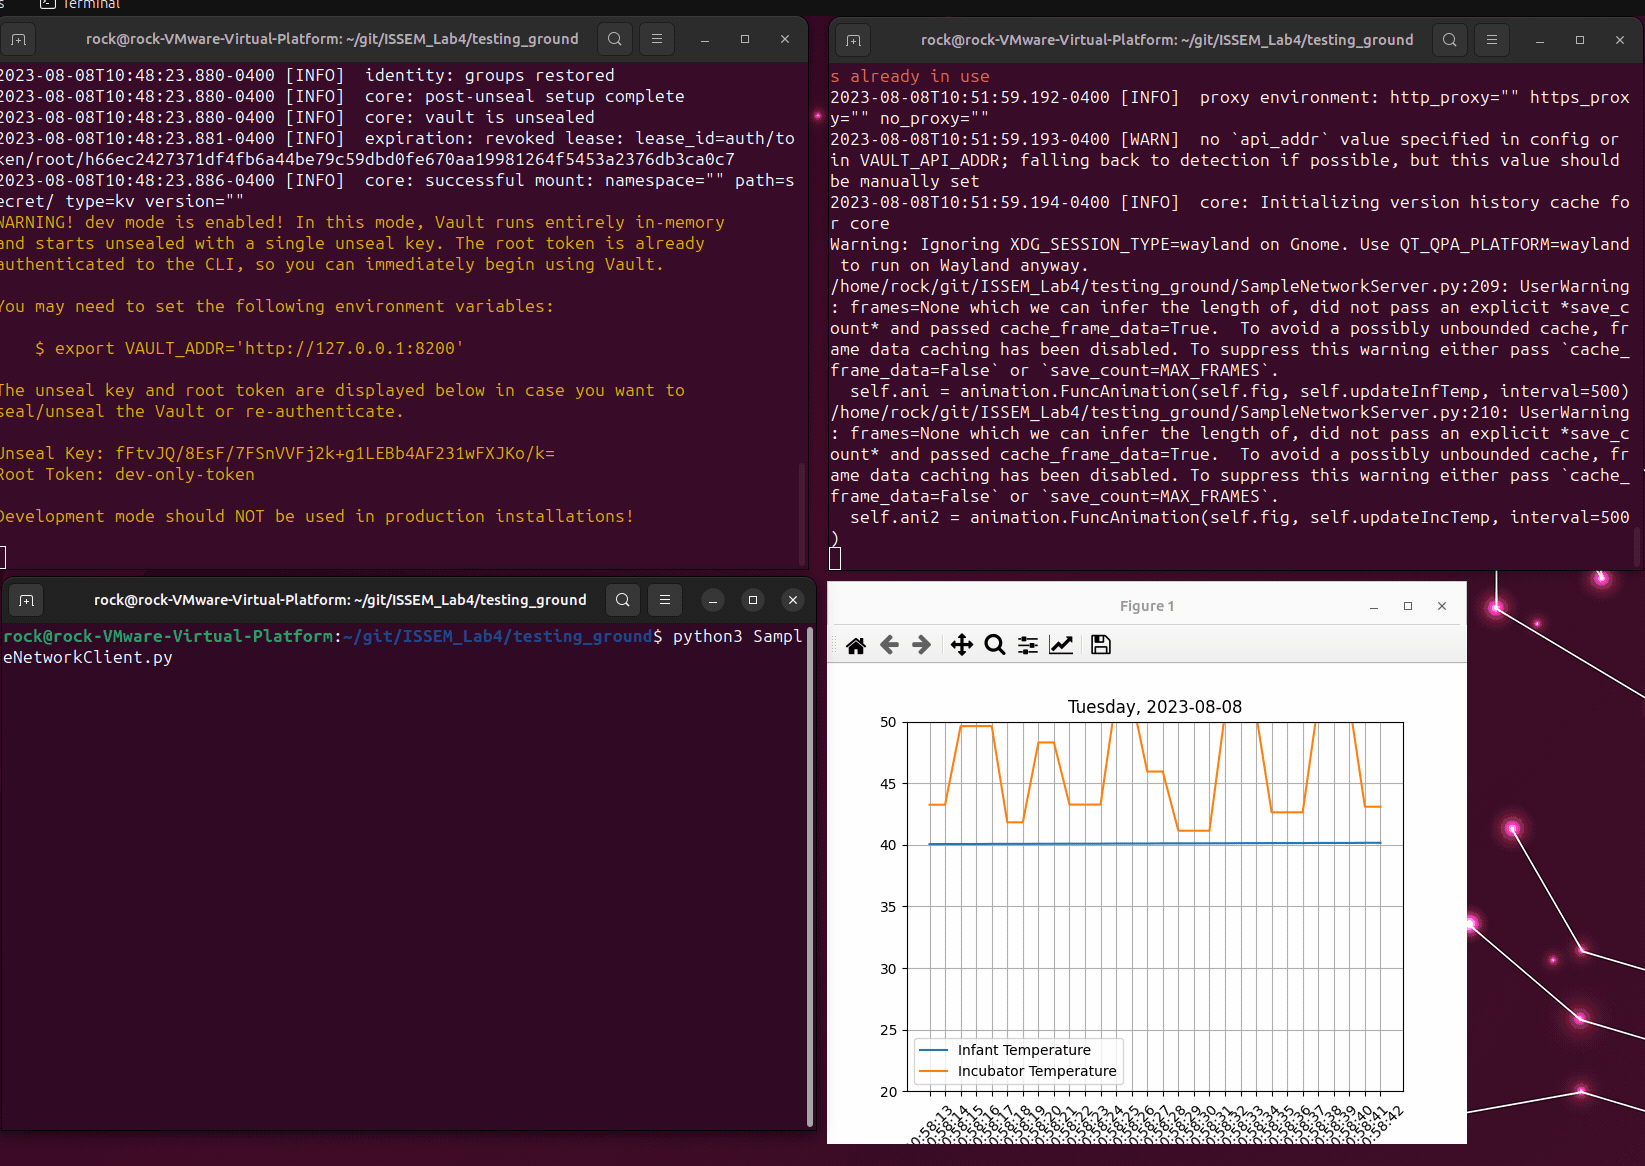

### Vulnerability 4 - Error Handling SimpleNetworkClient.py and SimplyNetworkServer.py



We can see here a demonstration of failure to connect and lack of error handling completely disconnecting the system, and a patched version that will reconnect after failure.

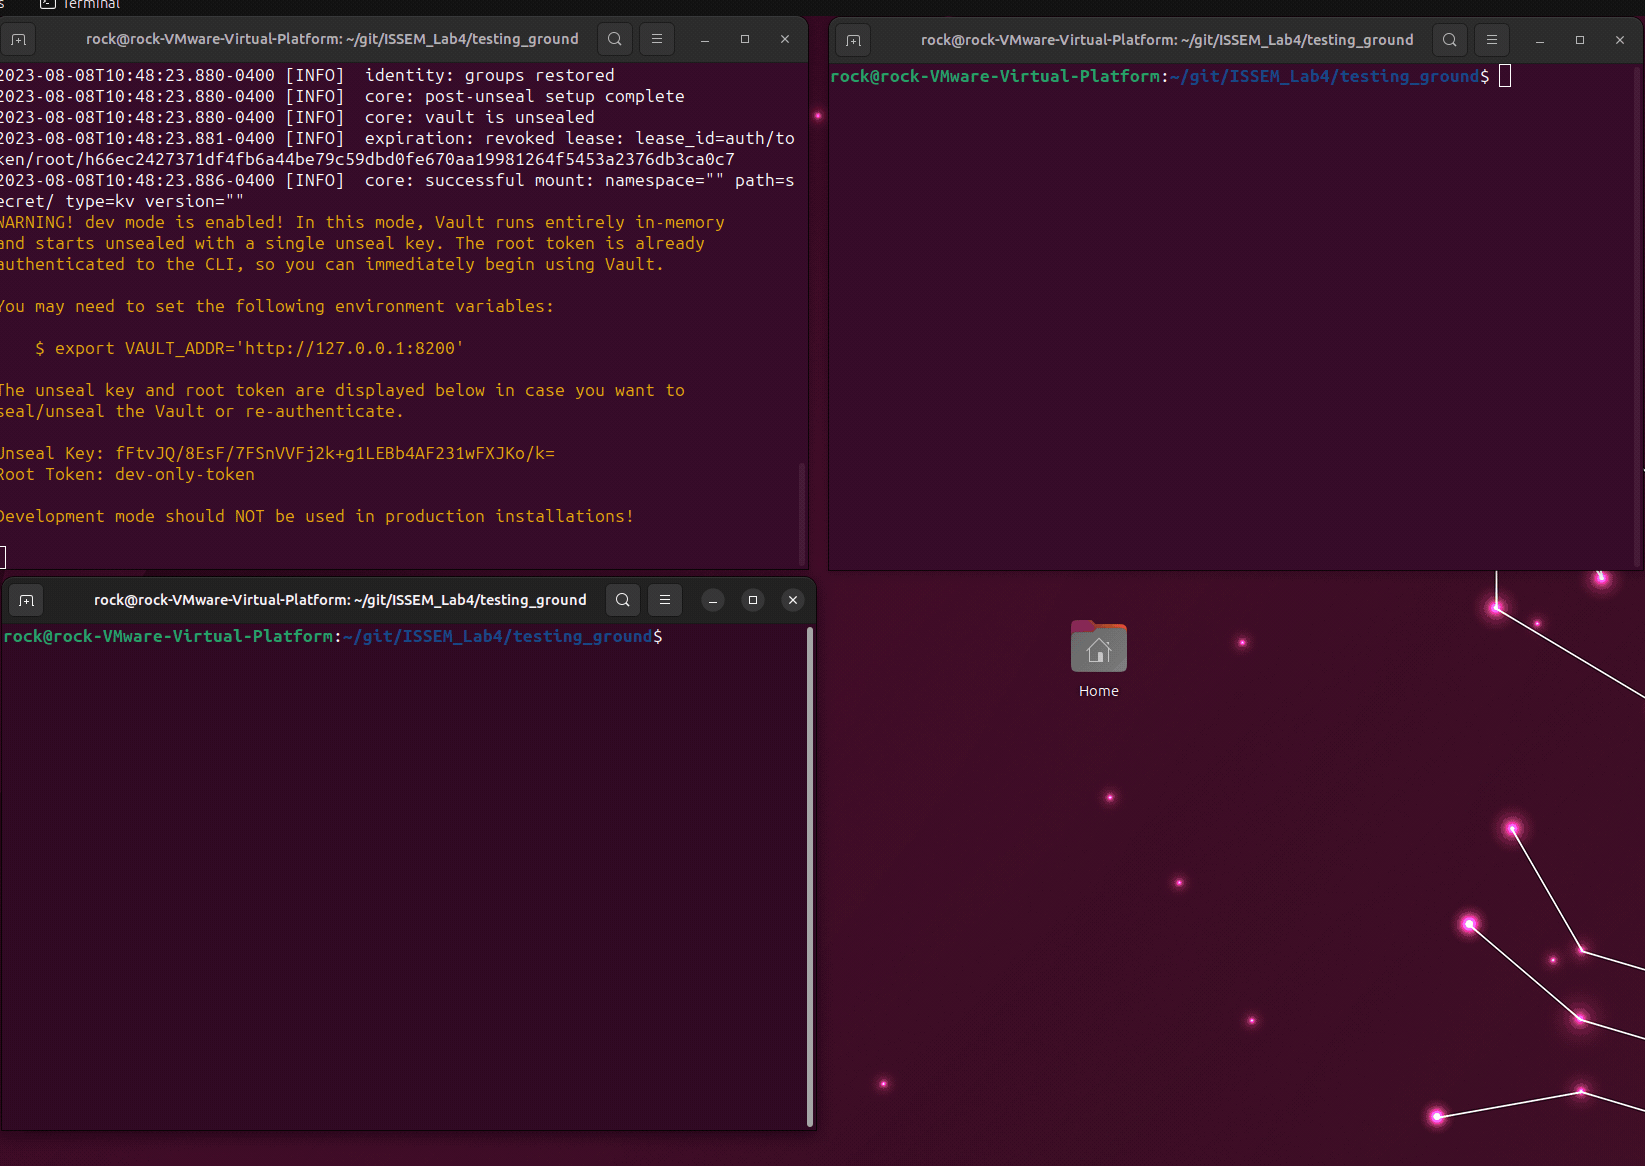

#### Vulnerability 5 - Poor Randomness